Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import numpy as np

DATA COLLECTION: 'nonvoters_data.csv' comes from fivethirtyeight.com data page. It is read by pandas to produce a DataFrame object.

In [3]:
voter_data = pd.read_csv("nonvoters_data.csv")

In [4]:
voter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Columns: 119 entries, RespId to voter_category
dtypes: float64(23), int64(91), object(5)
memory usage: 5.3+ MB


In [5]:
voter_data.head()

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,1,2,4,1,4,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,1,2,2,3,1,1,2,...,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
2,470003,1.0844,1,1,1,2,2,1,1,2,...,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,1,1,1,1,3,1,1,1,...,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,1,1,1,-1,1,1,1,1,...,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always


In [6]:
missing = pd.concat([voter_data.isnull().sum(),voter_data.isnull().mean()],axis=1)
missing.columns = ['Total null', '%']
print(missing.sort_values(by ='Total null', ascending=False))


                Total null         %
Q22                   5350  0.916724
Q29_10                4494  0.770048
Q29_2                 4494  0.770048
Q29_3                 4494  0.770048
Q29_4                 4494  0.770048
...                    ...       ...
Q8_8                     0  0.000000
Q8_7                     0  0.000000
Q8_6                     0  0.000000
Q8_5                     0  0.000000
voter_category           0  0.000000

[119 rows x 2 columns]


The output below shows the questions that have any null entries. Only these questions have null entries: 22, 28, 29, 31, 32, 33

In [7]:
l = len(missing['Total null'])
for i in range(l):
    if missing.iloc[i,0] > 0:
        print(missing.index[i], missing.iloc[i,0])


Q22 5350
Q28_1 534
Q28_2 534
Q28_3 534
Q28_4 534
Q28_5 534
Q28_6 534
Q28_7 534
Q28_8 534
Q29_1 4494
Q29_2 4494
Q29_3 4494
Q29_4 4494
Q29_5 4494
Q29_6 4494
Q29_7 4494
Q29_8 4494
Q29_9 4494
Q29_10 4494
Q31 4244
Q32 3834
Q33 3594


In [8]:
print(voter_data['Q22'].describe())


count    486.000000
mean       4.211934
std        2.110929
min       -1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max        7.000000
Name: Q22, dtype: float64


In [9]:
print(voter_data[['Q21','Q22']].head(15))

    Q21  Q22
0     1  NaN
1     1  NaN
2     1  NaN
3     1  NaN
4     1  NaN
5     2  7.0
6     1  NaN
7     1  NaN
8     1  NaN
9     2  NaN
10    1  NaN
11    1  NaN
12    2  6.0
13    1  NaN
14    3  NaN


In [10]:
voter_data['Q22'] = voter_data['Q22'].astype('category')

In [11]:
voter_data['Q22'].describe()


count     486.0
unique      8.0
top         4.0
freq      116.0
Name: Q22, dtype: float64

In [12]:
voter_data = voter_data.astype('category')

In [13]:
voter_data['income_cat'].describe()

count         5836
unique           4
top       $75-125k
freq          1628
Name: income_cat, dtype: object

<AxesSubplot:>

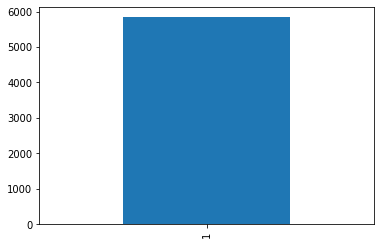

In [14]:
voter_data.Q1.value_counts().plot(kind='bar')

In [15]:
voter_data['Q1'].describe()


count     5836
unique       1
top          1
freq      5836
Name: Q1, dtype: int64

Q1: Everyone must answer "Yes" they are a U.S. citizen so this question can be dropped.

In [16]:
voter_data = voter_data.drop(columns='Q1')

In [17]:
voter_data.head(2)

,RespId,weight,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,2,4,1,4,2,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,2,2,3,1,1,2,1,...,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always


In [18]:
print(voter_data['Q28_2'].describe())

count     5302.0
unique       2.0
top         -1.0
freq      3373.0
Name: Q28_2, dtype: float64


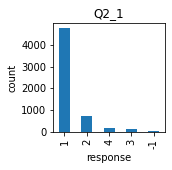

In [19]:
voter_data['Q2_1'].value_counts().plot(kind='bar', figsize=(2,2))

plt.title('Q2_1')
plt.xlabel('response')
plt.ylabel('count')
plt.show()

In [20]:
variables = voter_data.drop(columns=['RespId','weight','ppage'])

In [21]:
def print_figure(df,col_label):
    always_count = df[df['voter_category']=='always'][col_label].value_counts()
    counts_always = []
    for i in range(len(always_count)):
        counts_always.append(always_count.iloc[i])
    labels_a = list(always_count.index)

    never_count = df[df['voter_category']=='rarely/never'][col_label].value_counts()
    counts_never = []
    for i in range(len(never_count)):
        counts_never.append(never_count.iloc[i])
    labels_n = list(never_count.index)

    always_df = pd.DataFrame(counts_always, index=labels_a, columns=['A'])
    never_df = pd.DataFrame(counts_never, index=labels_n, columns=['N'])
    complete_df = always_df.join(never_df)
    complete_df.sort_index(inplace=True)

    labels = list(complete_df.index)
    always_counts = list(complete_df['A'])
    never_counts = list(complete_df['N'])



    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()

    rects1 = ax.bar(x - width/2, always_counts, width, label='Always')
    rects2 = ax.bar(x + width/2, never_counts, width, label='Never')
    #

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Count')
    ax.set_title(col_label)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    return plt.show()

In [22]:
variables.columns

Index(['Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9',
       'Q2_10',
       ...
       'Q29_10', 'Q30', 'Q31', 'Q32', 'Q33', 'educ', 'race', 'gender',
       'income_cat', 'voter_category'],
      dtype='object', length=115)

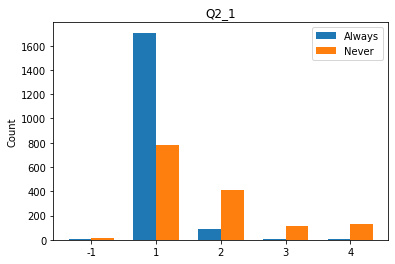

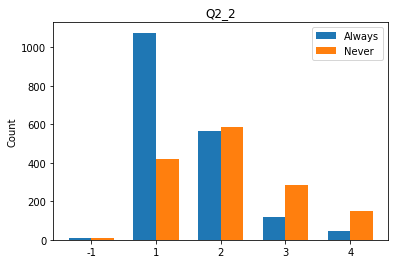

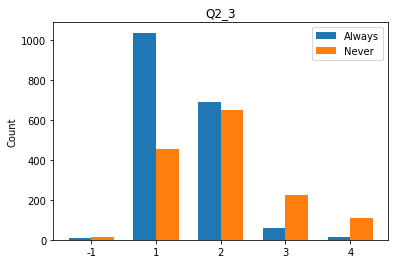

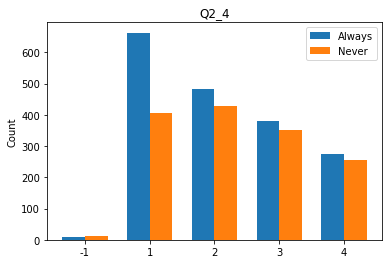

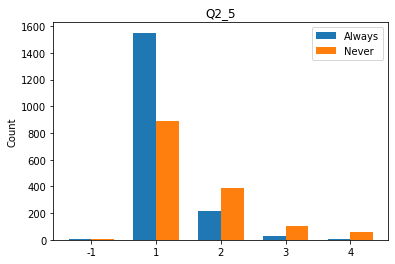

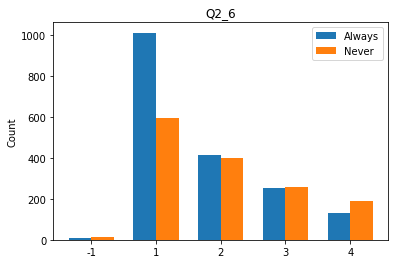

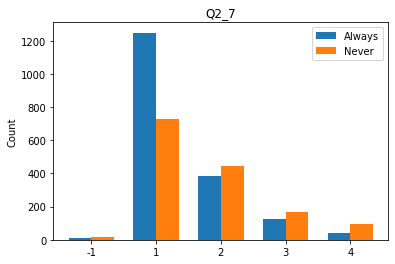

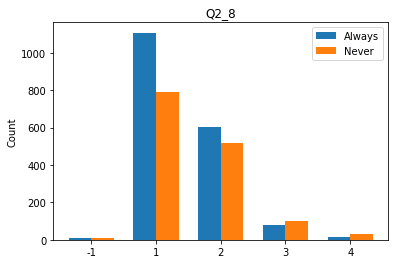

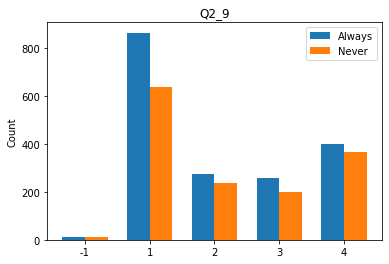

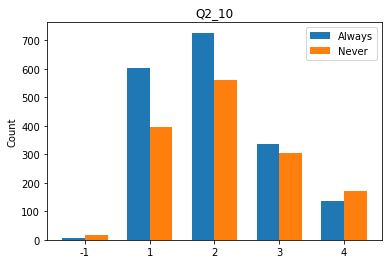

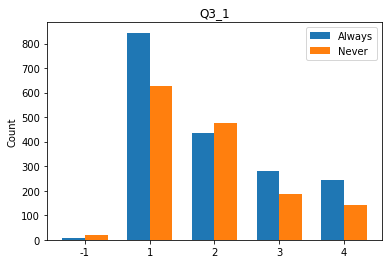

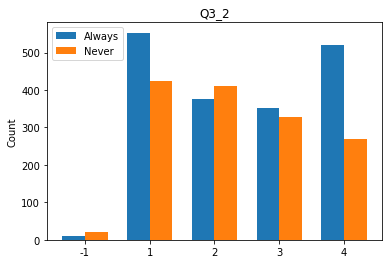

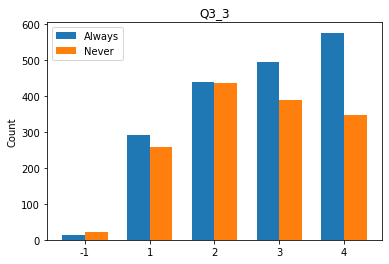

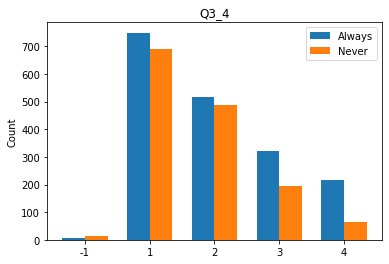

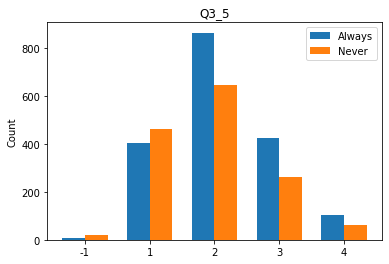

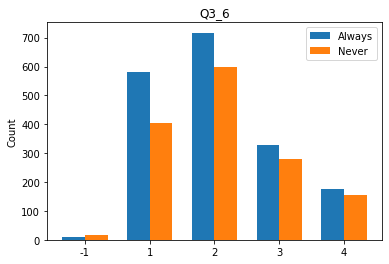

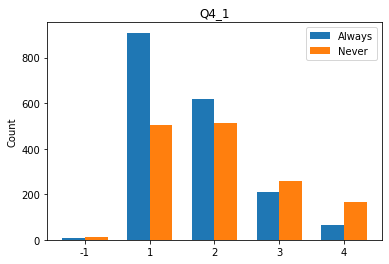

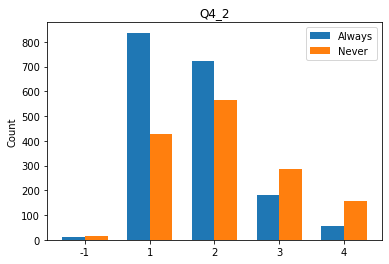

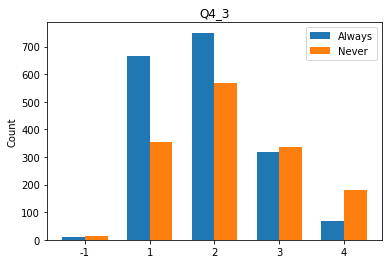

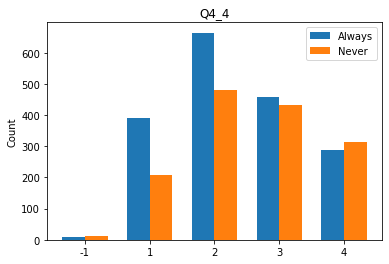

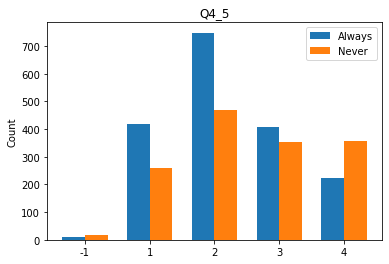

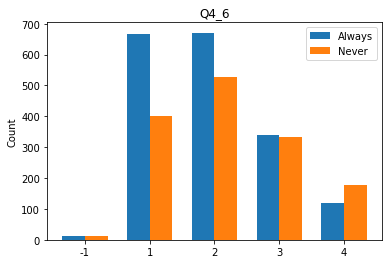

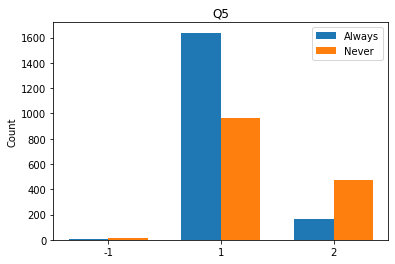

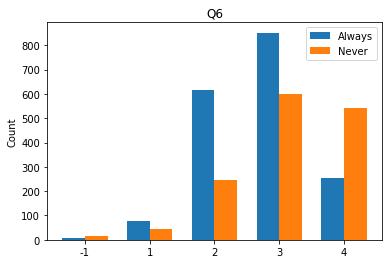

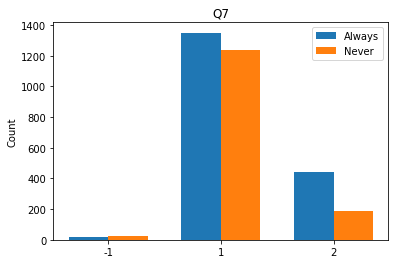

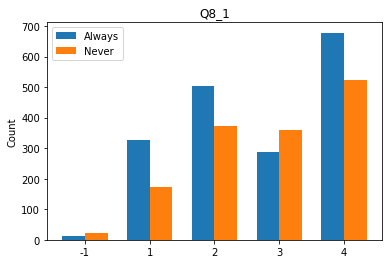

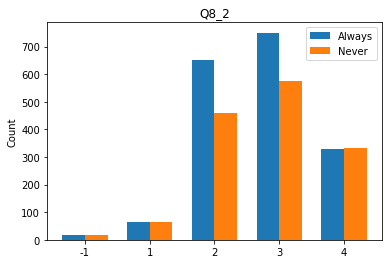

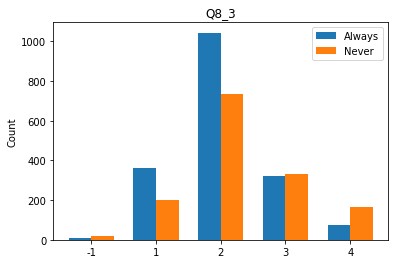

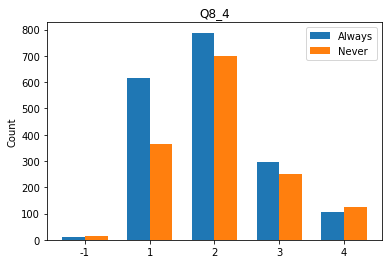

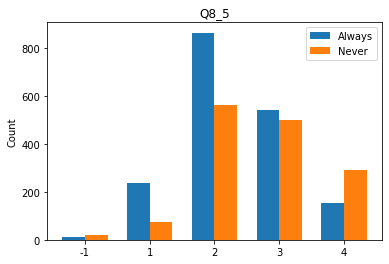

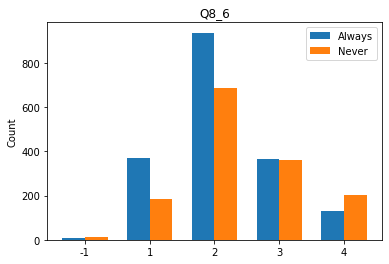

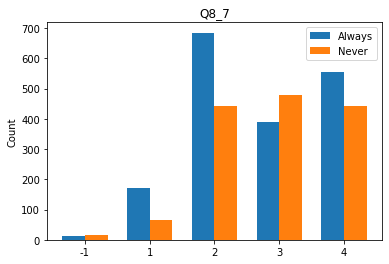

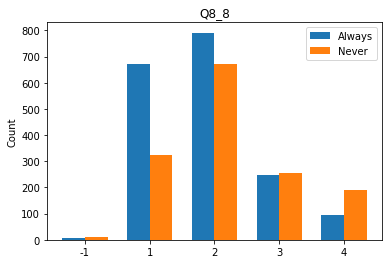

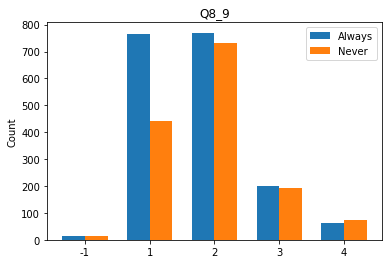

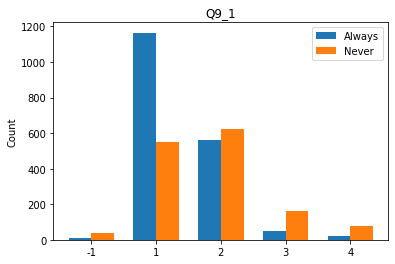

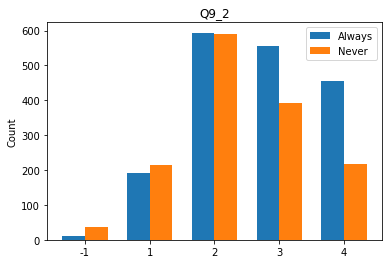

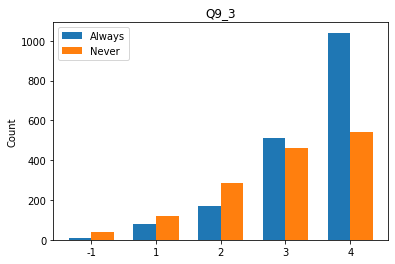

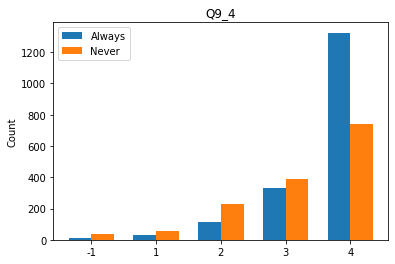

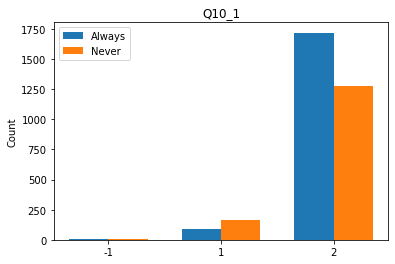

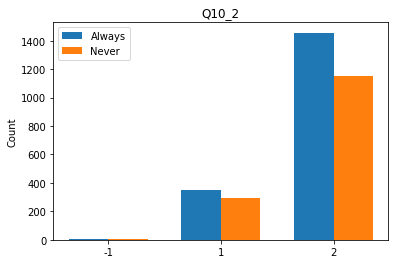

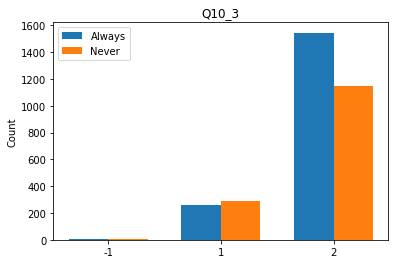

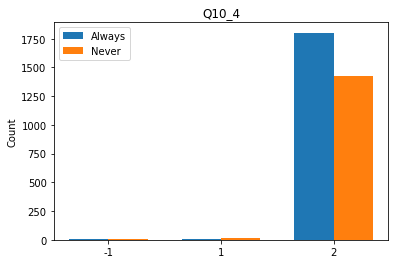

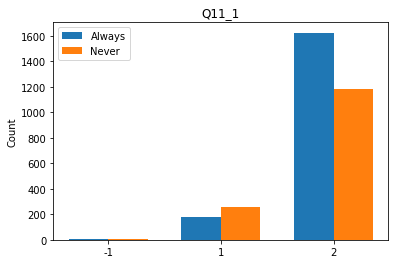

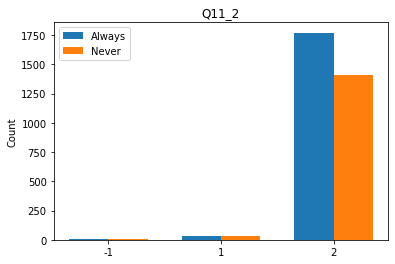

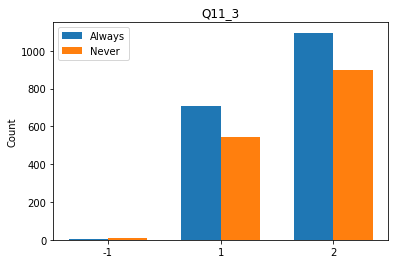

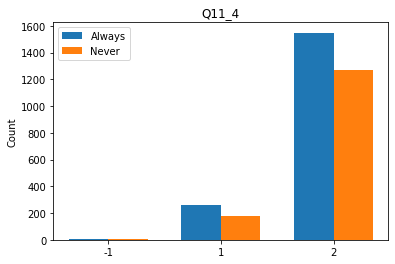

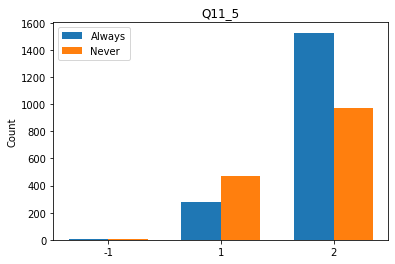

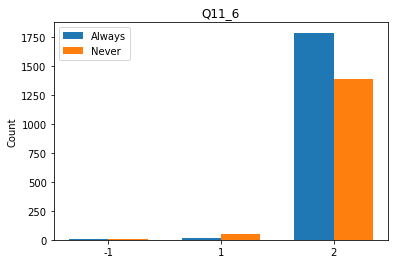

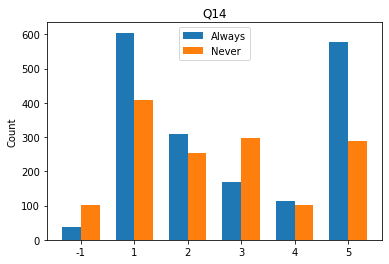

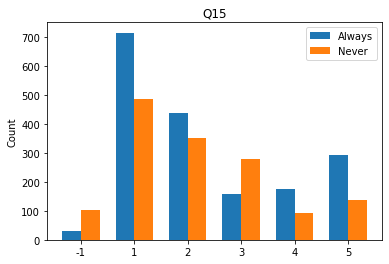

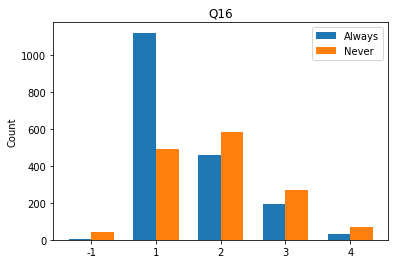

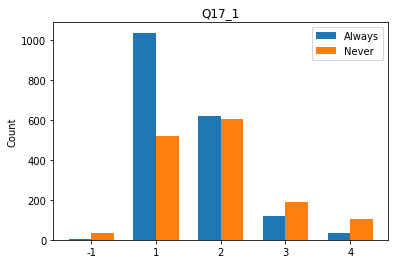

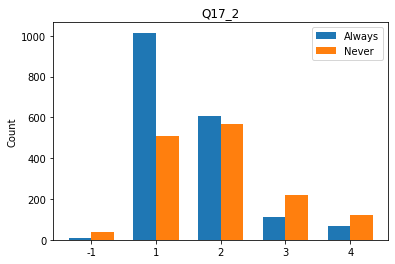

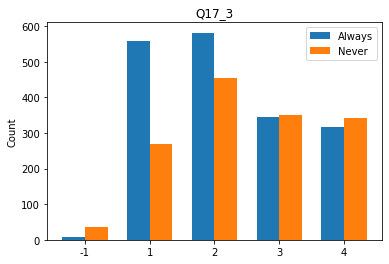

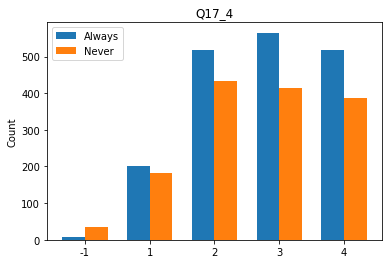

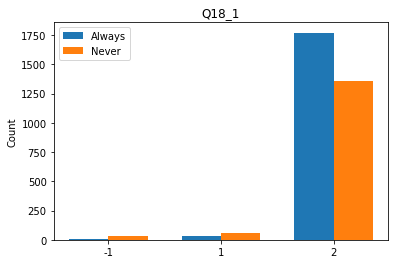

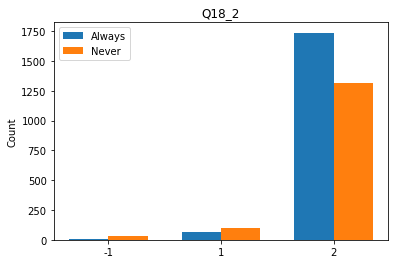

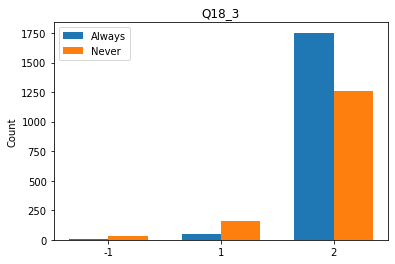

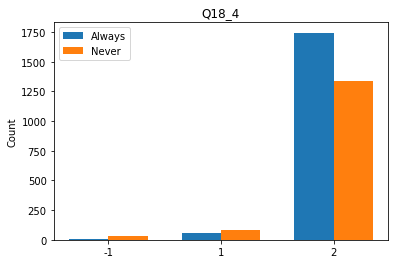

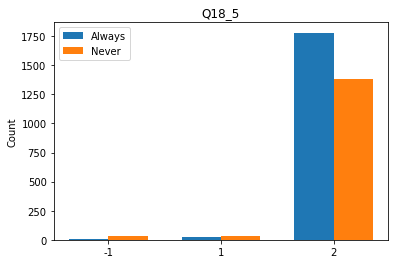

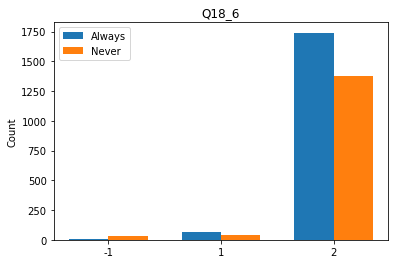

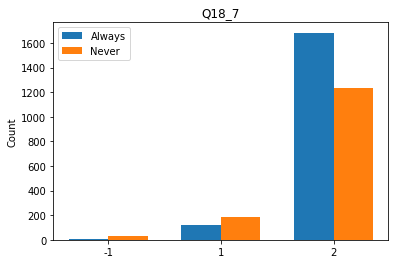

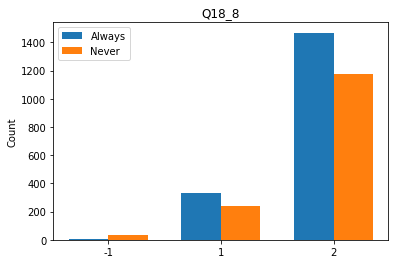

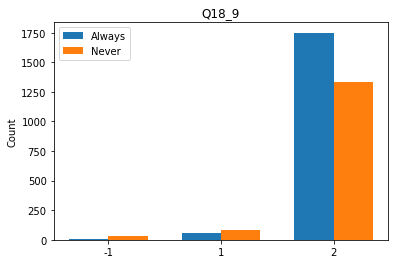

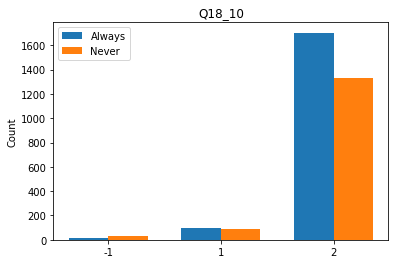

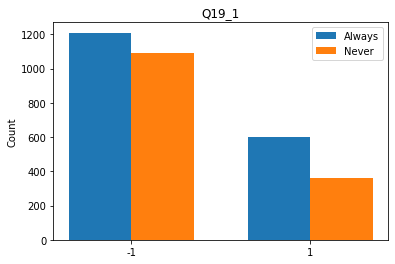

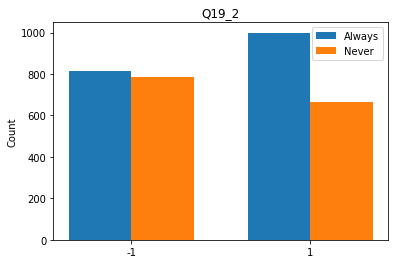

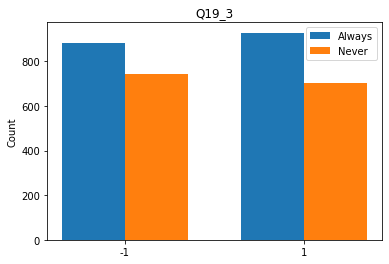

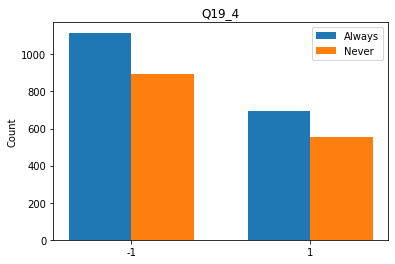

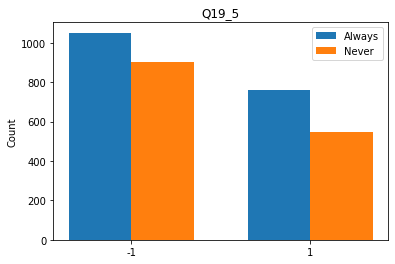

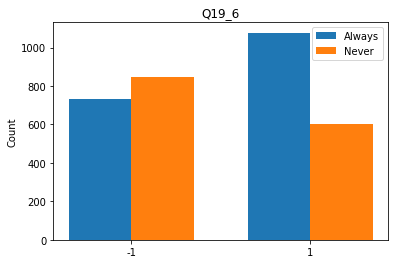

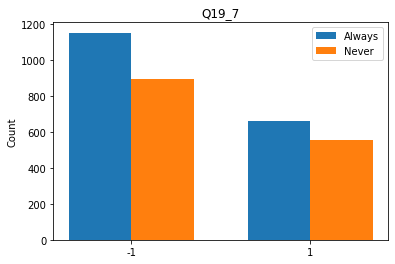

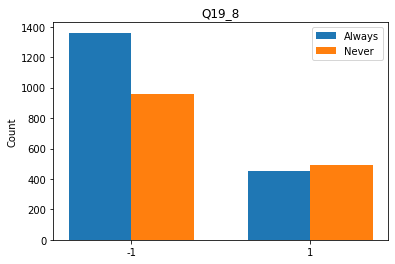

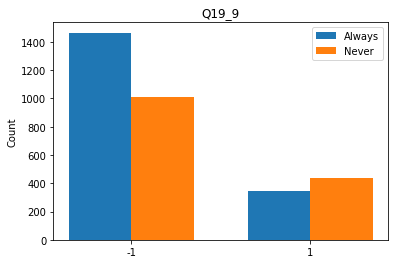

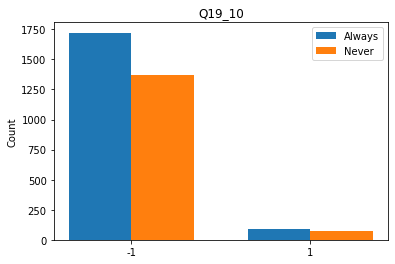

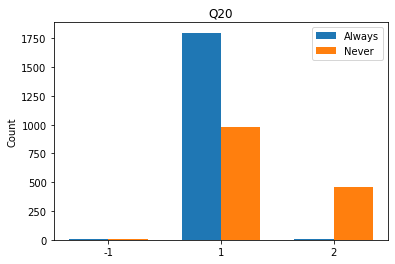

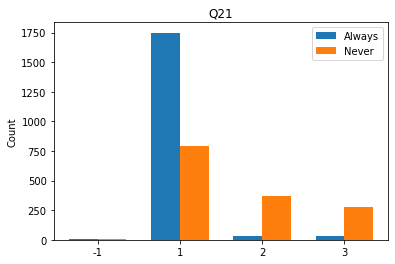

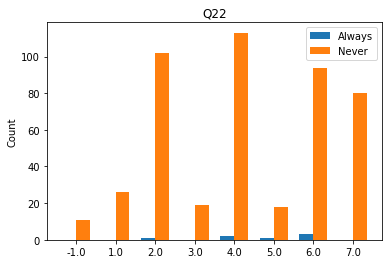

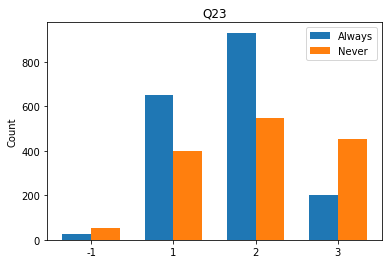

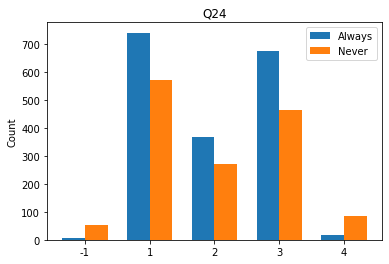

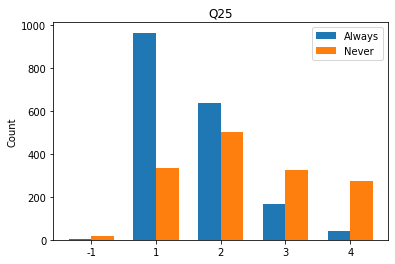

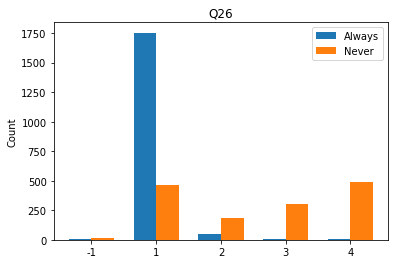

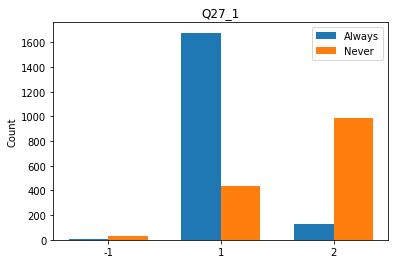

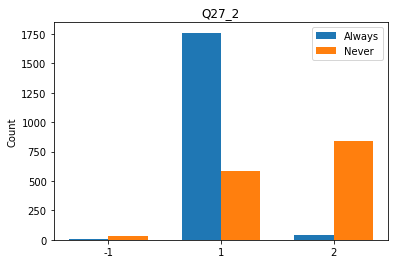

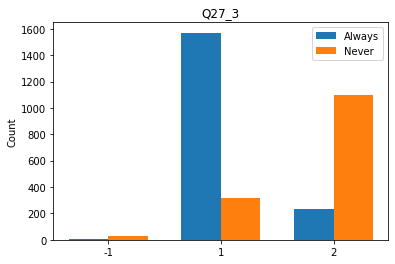

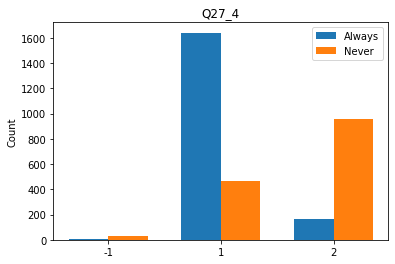

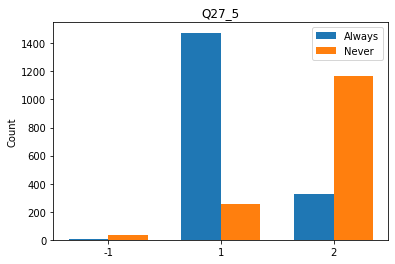

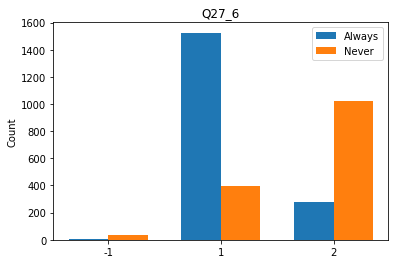

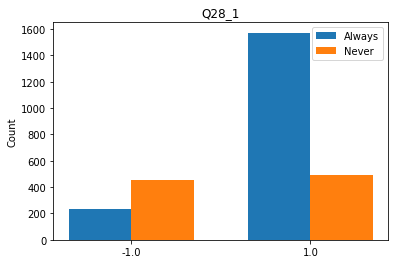

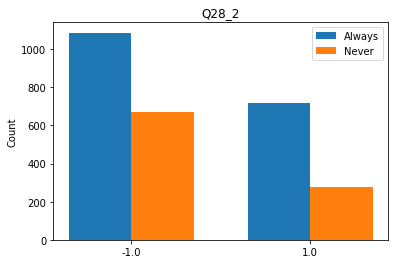

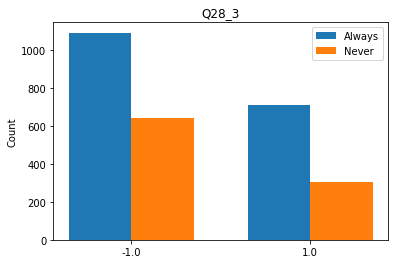

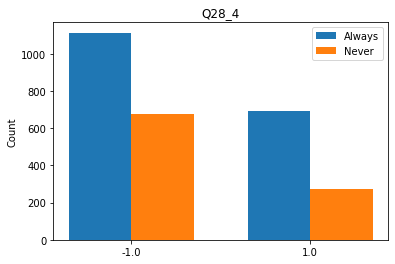

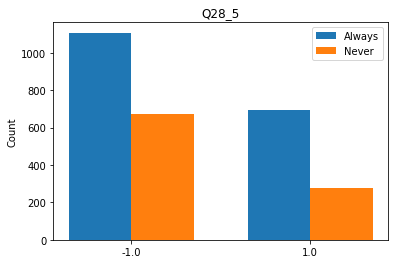

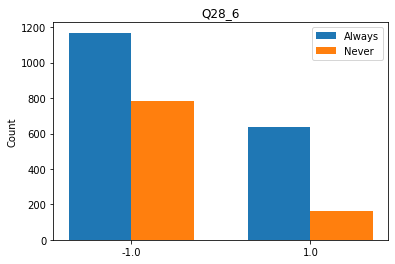

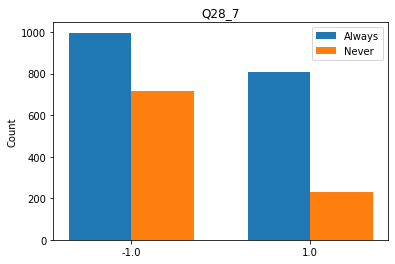

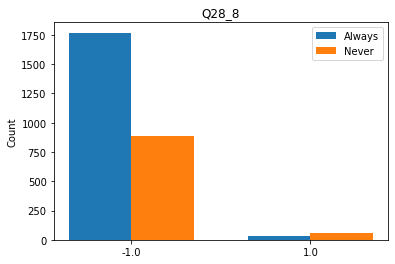

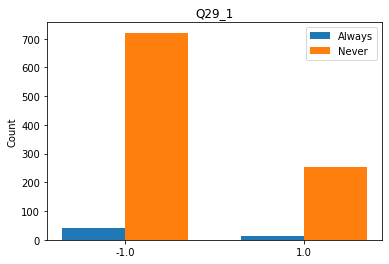

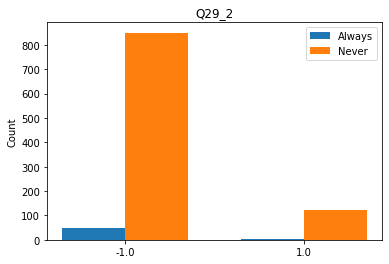

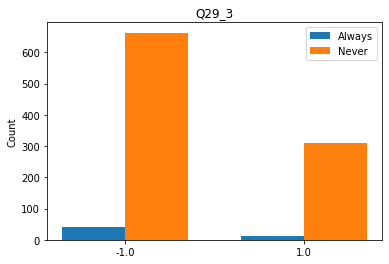

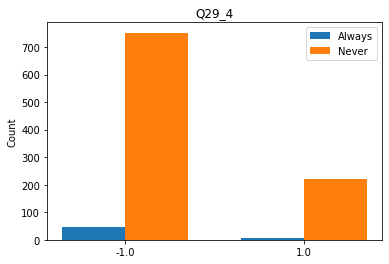

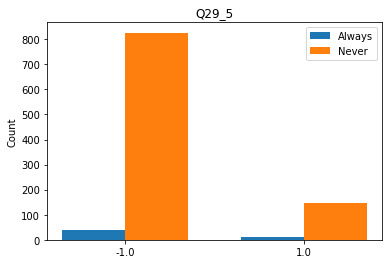

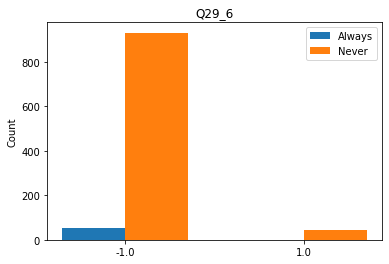

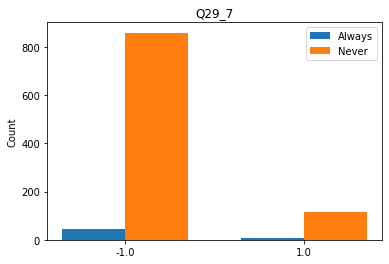

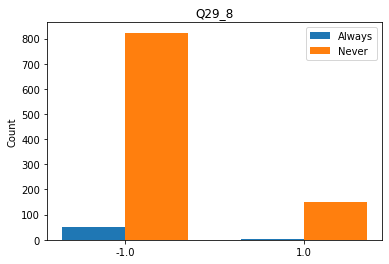

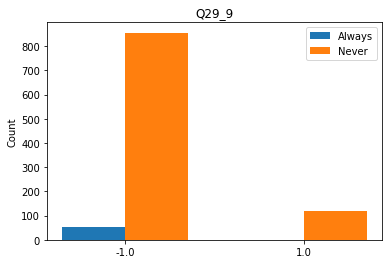

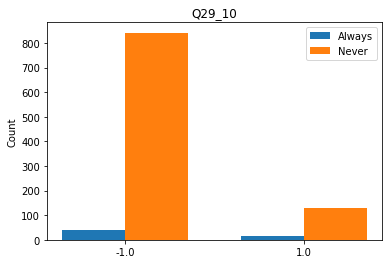

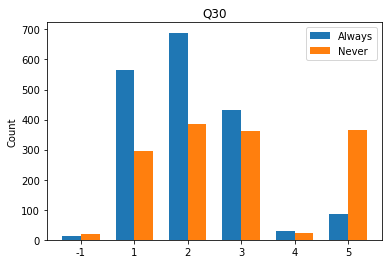

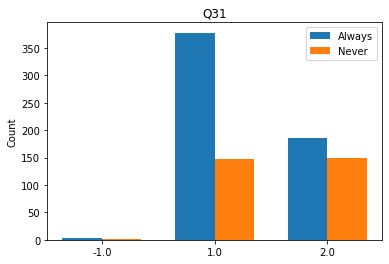

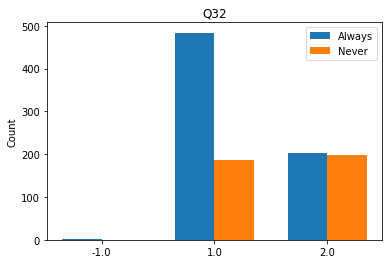

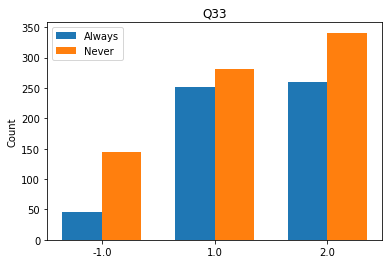

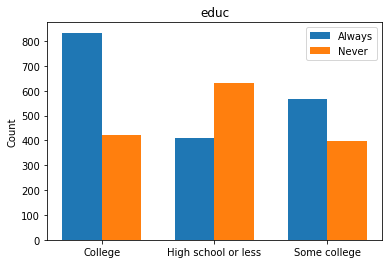

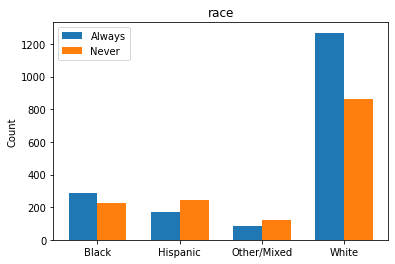

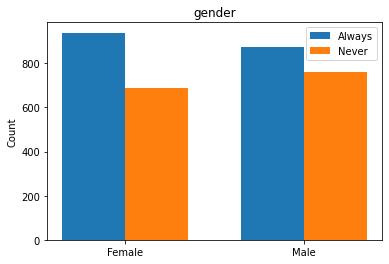

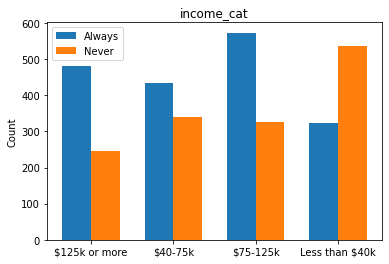

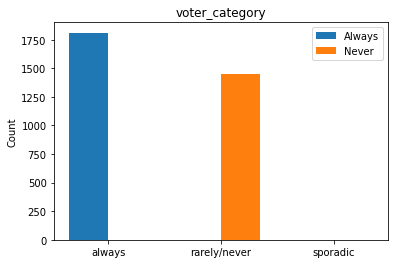

In [23]:
for i, col in enumerate(variables.columns):
    print_figure(variables, col)

In [ ]:
for i, col in enumerate(variables.columns):
    variables[col].value_counts().plot(fig=plt.figure(i), kind='bar')
    plt.title(col)
plt.show()